In [30]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import sys
sys.path.append('/home/yangyuxi/QuantResearch/HKUquantDataSdk/')

In [ ]:
from HKUquantDataSdk import HKUquantDataSdk
ds = HKUquantDataSdk(user='group1', password='PASSWORD')

In [32]:
mkt_open = '9:30:00'
mkt_close = '15:00:00'
lunch_begin = '11:30:00'
lunch_end = '13:00:00'
photovoltaic_tickers = [
    '601012.SH', '688223.SH', '002459.SZ', '600438.SH', '688472.SH'
]
semiconductor_tickers = [
    '688981.SH', '600584.SH', '688008.SH', '688126.SH', '688041.SH'
]
comm_service_tickers = [
    '000839.SZ', '600050.SH', '601728.SH', '300310.SZ', '002123.SZ'
]
comm_device_tickers = [
    '600105.SH', '002583.SZ', '000063.SZ', '600734.SH', '600522.SH'
]
ticker_sectors = {
    "Photovoltaic": photovoltaic_tickers,
    "Semiconductor": semiconductor_tickers,
    "CommService": comm_service_tickers,
    "CommDevice": comm_device_tickers,
}
tickers = [t for ts in ticker_sectors.values() for t in ts]
date_range = ('2021-01-01', '2024-06-01')

In [33]:
def get_data(start_date: str, end_date: str) -> pd.DataFrame:
    return ds.get_mins_history(
        tickers=tickers,
        fields=['Open', 'Close', 'Low', 'High', 'TurnoverRatio', 'ChangeRatio', 'AccChangeRatio', 'Volume', 'SellVolume', 'BuyVolume', 'Amount'],
        start_date=start_date.replace('-', ''),
        end_date=end_date.replace('-', ''),
        begin_time=mkt_open,
        end_time=mkt_close,
        price_mode='REAL',
        source='stock',
    )

In [34]:
def get_eod_data(start_date: str, end_date: str) -> pd.DataFrame:
    return ds.get_eod_history(
        tickers=tickers,
        fields=['Open', 'PreClose', 'Volume', 'Amount', 'ChangeRatio', 'UpAndDownStatus'],
        start_date=start_date.replace('-', ''),
        end_date=end_date.replace('-', ''),
        price_mode='AFTER',
        source='stock',
    )

In [35]:
raw_data: pd.DataFrame = get_data(*date_range)
raw_data

,ticker,TimeStamp,Open,Close,Low,High,TurnoverRatio,ChangeRatio,Volume,SellVolume,BuyVolume,Amount,AccChangeRatio
0,000063.SZ,2021-01-04 09:30:00,33.00,33.00,33.00,33.00,0.0251,-1.9316,873500.0,3266760.0,5993840.0,2.882550e+07,-1.931600
1,000063.SZ,2021-01-04 09:31:00,32.92,33.09,32.91,33.15,0.1050,0.2727,3650700.0,1125000.0,826000.0,1.205605e+08,-1.664167
2,000063.SZ,2021-01-04 09:32:00,33.10,33.27,33.09,33.28,0.0297,0.5440,1031300.0,1205400.0,1015200.0,3.419059e+07,-1.129221
3,000063.SZ,2021-01-04 09:33:00,33.26,33.03,33.03,33.26,0.0307,-0.7214,1068400.0,2366800.0,2045600.0,3.543372e+07,-1.842474
4,000063.SZ,2021-01-04 09:34:00,33.03,32.94,32.90,33.03,0.0629,-0.2725,2185700.0,1512888.0,957568.0,7.203795e+07,-2.109954
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632106,688981.SH,2024-05-31 14:56:00,44.84,44.87,44.83,44.87,0.0081,0.0669,160506.0,85176.0,75330.0,7.199000e+06,-1.145659
3632107,688981.SH,2024-05-31 14:57:00,44.88,44.87,44.87,44.89,0.0093,0.0000,183208.0,99020.0,84188.0,8.221200e+06,-1.145659
3632108,688981.SH,2024-05-31 14:58:00,44.87,44.87,44.87,44.87,0.0000,0.0000,0.0,0.0,0.0,0.000000e+00,-1.145659
3632109,688981.SH,2024-05-31 14:59:00,44.87,44.87,44.87,44.87,0.0000,0.0000,0.0,0.0,0.0,0.000000e+00,-1.145659


In [36]:
raw_eod_data: dict[str, pd.DataFrame] = get_eod_data(*date_range)
raw_eod_data

{'Open': ticker       000063.SZ  000839.SZ   002123.SZ  002459.SZ  002583.SZ  \
 TradingDay                                                            
 20210104    523.741020  53.587911  106.034880  54.288633  34.965674   
 20210105    539.294541  53.135693  104.640650  56.274802  35.190534   
 20210106    552.308712  52.457365  104.200367  55.255235  35.246749   
 20210107    528.502302  52.005146  102.732756  53.467683  34.178665   
 20210108    516.599097  49.291834   98.036401  53.984087  33.279227   
 ...                ...        ...         ...        ...        ...   
 20240527    440.547191  57.205660   59.647525  38.803651  23.094119   
 20240528    445.296585  56.301223   58.248386  38.410637  23.206773   
 20240529    441.857369  54.492349   57.732913  40.768725  22.981465   
 20240530    438.254380  55.849005   57.438358  41.803546  22.699829   
 20240531    440.219647  57.657879   57.953830  42.074998  22.868811   
 
 ticker      300310.SZ  600050.SH  600105.SH   600438.

In [37]:
eod_data = pd.DataFrame(
    [
        *[
            (
                ticker,
                dt.date(int(open_price[0][:4]), int(open_price[0][4:6]), int(open_price[0][6:])),
                (float(open_price_ticker) - float(pre_close_ticker)) / float(pre_close_ticker),
                change_ratio_ticker,
                up_and_down_statud_ticker,
                volume_ticker,
                amount_ticker,
            )
            for (
                open_price, pre_close,
                change_ratio, up_and_down_status,
                volume, amount
            )
            in zip(
                raw_eod_data['Open'].iterrows(), raw_eod_data['PreClose'].iterrows(),
                raw_eod_data['ChangeRatio'].iterrows(), raw_eod_data['UpAndDownStatus'].iterrows(),
                raw_eod_data['Volume'].iterrows(), raw_eod_data['Amount'].iterrows(),
            )
            for (
                (ticker, open_price_ticker), pre_close_ticker,
                change_ratio_ticker, up_and_down_statud_ticker,
                volume_ticker, amount_ticker,
            )
            in zip(
                open_price[1].items(), pre_close[1],
                change_ratio[1], up_and_down_status[1],
                volume[1], amount[1]
            )
        ]
    ],
    columns=[
        'ticker', 'TradingDay', 'Gap',
        'ChangeRatioEod', 'UpAndDownStatus',
        'VolumeEod', 'AmountEod',
    ],
).dropna()
eod_data

,ticker,TradingDay,Gap,ChangeRatioEod,UpAndDownStatus,VolumeEod,AmountEod
0,000063.SZ,2021-01-04,-0.019316,2.0208,0.0,1296473.46,4343079.819
1,000839.SZ,2021-01-04,0.004237,-0.4237,0.0,203126.76,47738.487
2,002123.SZ,2021-01-04,0.015460,-0.0703,0.0,136619.85,195826.158
3,002459.SZ,2021-01-04,0.006876,5.8448,0.0,266837.69,1133036.774
4,002583.SZ,2021-01-04,0.013029,2.9316,0.0,210921.78,131773.140
...,...,...,...,...,...,...,...
16495,688041.SH,2024-05-31,0.007049,2.5752,0.0,123476.12,870882.762
16496,688126.SH,2024-05-31,-0.003636,-1.6000,0.0,134177.34,182706.655
16497,688223.SH,2024-05-31,0.001248,1.7478,0.0,650584.31,524969.824
16498,688472.SH,2024-05-31,0.007937,0.8730,0.0,110623.78,140888.847


In [38]:
data = raw_data.merge(eod_data, left_on=(raw_data['TimeStamp'].dt.date, 'ticker'), right_on=('TradingDay', 'ticker'))

data['Time'] = data['TimeStamp'].dt.time

data['DayOfWeek'] = data['TimeStamp'].dt.weekday

def find_sector(t: str) -> str:
    for s, ts in ticker_sectors.items():
        if t in ts:
            return s
    raise
data['Sector'] = data['ticker'].transform(find_sector)

data['AccChangeRatio'] = data['AccChangeRatio'] - data['Gap'] * 100

index_cols = ['ticker', 'Sector', 'TimeStamp', 'TradingDay', 'DayOfWeek', 'Time']
min_cols = ['Open', 'Close', 'Low', 'High', 'TurnoverRatio', 'ChangeRatio', 'Volume', 'SellVolume', 'BuyVolume', 'Amount', 'AccChangeRatio']
eod_cols = ['Gap', 'ChangeRatioEod', 'UpAndDownStatus', 'VolumeEod', 'AmountEod']
all_cols = index_cols + min_cols + eod_cols

data = data[all_cols]

data

,ticker,Sector,TimeStamp,TradingDay,DayOfWeek,Time,Open,Close,Low,High,...,Volume,SellVolume,BuyVolume,Amount,AccChangeRatio,Gap,ChangeRatioEod,UpAndDownStatus,VolumeEod,AmountEod
0,000063.SZ,CommDevice,2021-01-04 09:30:00,2021-01-04,0,09:30:00,33.00,33.00,33.00,33.00,...,873500.0,3266760.0,5993840.0,2.882550e+07,0.000049,-0.019316,2.0208,0.0,1296473.46,4343079.819
1,000063.SZ,CommDevice,2021-01-04 09:31:00,2021-01-04,0,09:31:00,32.92,33.09,32.91,33.15,...,3650700.0,1125000.0,826000.0,1.205605e+08,0.267482,-0.019316,2.0208,0.0,1296473.46,4343079.819
2,000063.SZ,CommDevice,2021-01-04 09:32:00,2021-01-04,0,09:32:00,33.10,33.27,33.09,33.28,...,1031300.0,1205400.0,1015200.0,3.419059e+07,0.802429,-0.019316,2.0208,0.0,1296473.46,4343079.819
3,000063.SZ,CommDevice,2021-01-04 09:33:00,2021-01-04,0,09:33:00,33.26,33.03,33.03,33.26,...,1068400.0,2366800.0,2045600.0,3.543372e+07,0.089175,-0.019316,2.0208,0.0,1296473.46,4343079.819
4,000063.SZ,CommDevice,2021-01-04 09:34:00,2021-01-04,0,09:34:00,33.03,32.94,32.90,33.03,...,2185700.0,1512888.0,957568.0,7.203795e+07,-0.178304,-0.019316,2.0208,0.0,1296473.46,4343079.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632106,688981.SH,Semiconductor,2024-05-31 14:56:00,2024-05-31,4,14:56:00,44.84,44.87,44.83,44.87,...,160506.0,85176.0,75330.0,7.199000e+06,-0.506752,-0.006389,-1.1897,0.0,314630.49,1414729.533
3632107,688981.SH,Semiconductor,2024-05-31 14:57:00,2024-05-31,4,14:57:00,44.88,44.87,44.87,44.89,...,183208.0,99020.0,84188.0,8.221200e+06,-0.506752,-0.006389,-1.1897,0.0,314630.49,1414729.533
3632108,688981.SH,Semiconductor,2024-05-31 14:58:00,2024-05-31,4,14:58:00,44.87,44.87,44.87,44.87,...,0.0,0.0,0.0,0.000000e+00,-0.506752,-0.006389,-1.1897,0.0,314630.49,1414729.533
3632109,688981.SH,Semiconductor,2024-05-31 14:59:00,2024-05-31,4,14:59:00,44.87,44.87,44.87,44.87,...,0.0,0.0,0.0,0.000000e+00,-0.506752,-0.006389,-1.1897,0.0,314630.49,1414729.533


In [39]:
def get_stats(model: LinearRegression, X, y) -> pd.DataFrame:
    lm = model
    lm.fit(X,y)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(X)

    # newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    newX = np.append(np.ones((len(X),1)), X, axis=1)
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

    df = pd.DataFrame()
    df["Coeff"],df["StdErr"],df["T"],df["P"] = [params,sd_b,ts_b,p_values]

    return df

In [40]:
def draw_line(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = x_vals * slope + intercept
    plt.plot(x_vals, y_vals, color='black')

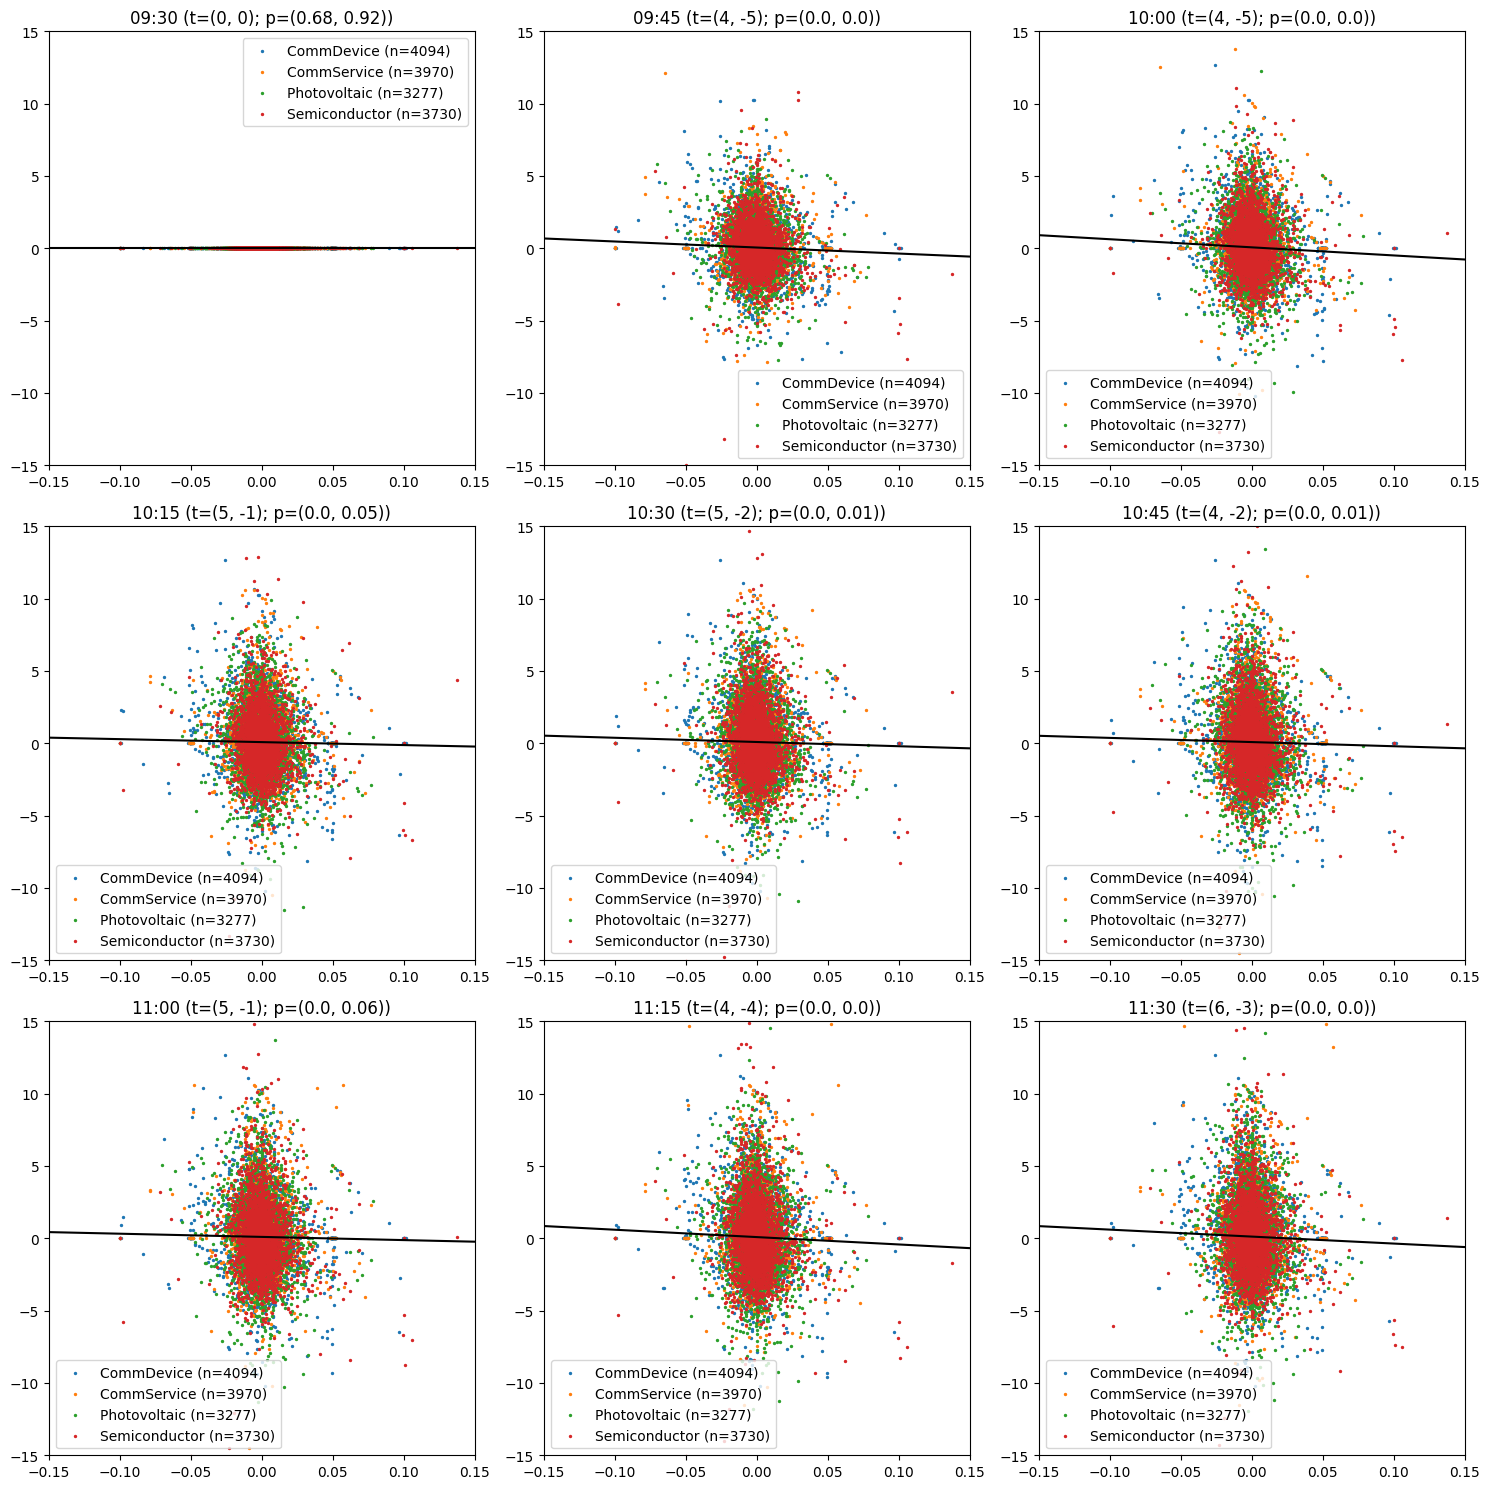

In [41]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

plt.figure(figsize=(15, 15))

for i in range(9):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 15)
    ).time()

    dq = d[(d['Time'] == time)]

    x = dq['Gap'].to_frame()
    y = dq['AccChangeRatio']

    model = LinearRegression()
    model.fit(x, y)
    model_stats = get_stats(model, x.to_numpy(), y.to_numpy())

    plt.subplot(3, 3, i + 1)

    title_time = time.strftime('%H:%M')
    title_t = ', '.join(model_stats['T'].astype(int).astype(str))
    title_p = ', '.join(model_stats['P'].round(2).astype(str))
    plt.title(f'{title_time} (t=({title_t}); p=({title_p}))')

    plt.ylim(-15, 15)
    plt.xlim(-0.15, 0.15)

    # For different sectors visualization
    for s, dqq in dq.groupby('Sector'):
        plt.scatter(
            dqq['Gap'],
            dqq['AccChangeRatio'],
            s=2,
            label=f'{s} (n={len(dqq)})'
        )
    plt.legend()

    # plt.scatter(
    #     x,
    #     y,
    #     s=2,
    # )

    draw_line(model.coef_, model.intercept_)

plt.tight_layout()
plt.show()

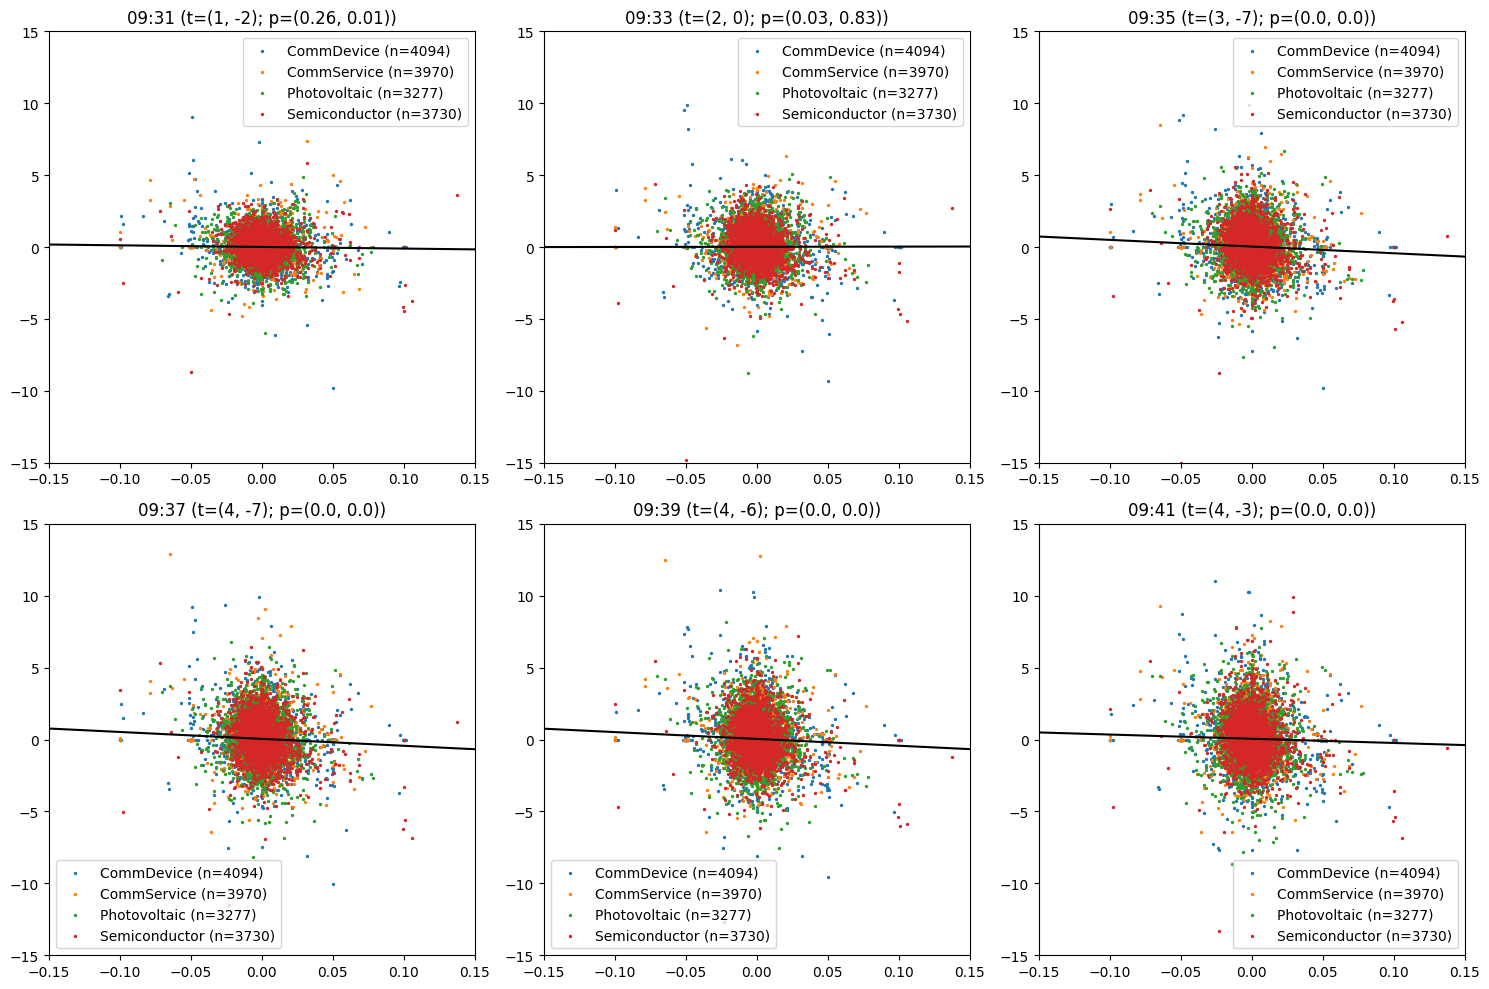

In [42]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

plt.figure(figsize=(15, 10))

for i in range(6):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 2 + 1)
    ).time()

    dq = d[(d['Time'] == time)]

    x = dq['Gap'].to_frame()
    y = dq['AccChangeRatio']

    model = LinearRegression()
    model.fit(x, y)
    model_stats = get_stats(model, x.to_numpy(), y.to_numpy())

    plt.subplot(2, 3, i + 1)

    title_time = time.strftime('%H:%M')
    title_t = ', '.join(model_stats['T'].astype(int).astype(str))
    title_p = ', '.join(model_stats['P'].round(2).astype(str))
    plt.title(f'{title_time} (t=({title_t}); p=({title_p}))')

    plt.ylim(-15, 15)
    plt.xlim(-0.15, 0.15)

    # For different sectors visualization
    for s, dqq in dq.groupby('Sector'):
        plt.scatter(
            dqq['Gap'],
            dqq['AccChangeRatio'],
            s=2,
            label=f'{s} (n={len(dqq)})'
        )
    plt.legend()

    # plt.scatter(
    #     x,
    #     y,
    #     s=2,
    # )

    draw_line(model.coef_, model.intercept_)

plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:         AccChangeRatio   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     35.11
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           3.18e-09
Time:                        11:42:29   Log-Likelihood:                -30017.
No. Observations:               15071   AIC:                         6.004e+04
Df Residuals:                   15069   BIC:                         6.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0671      0.014      4.643      0.0

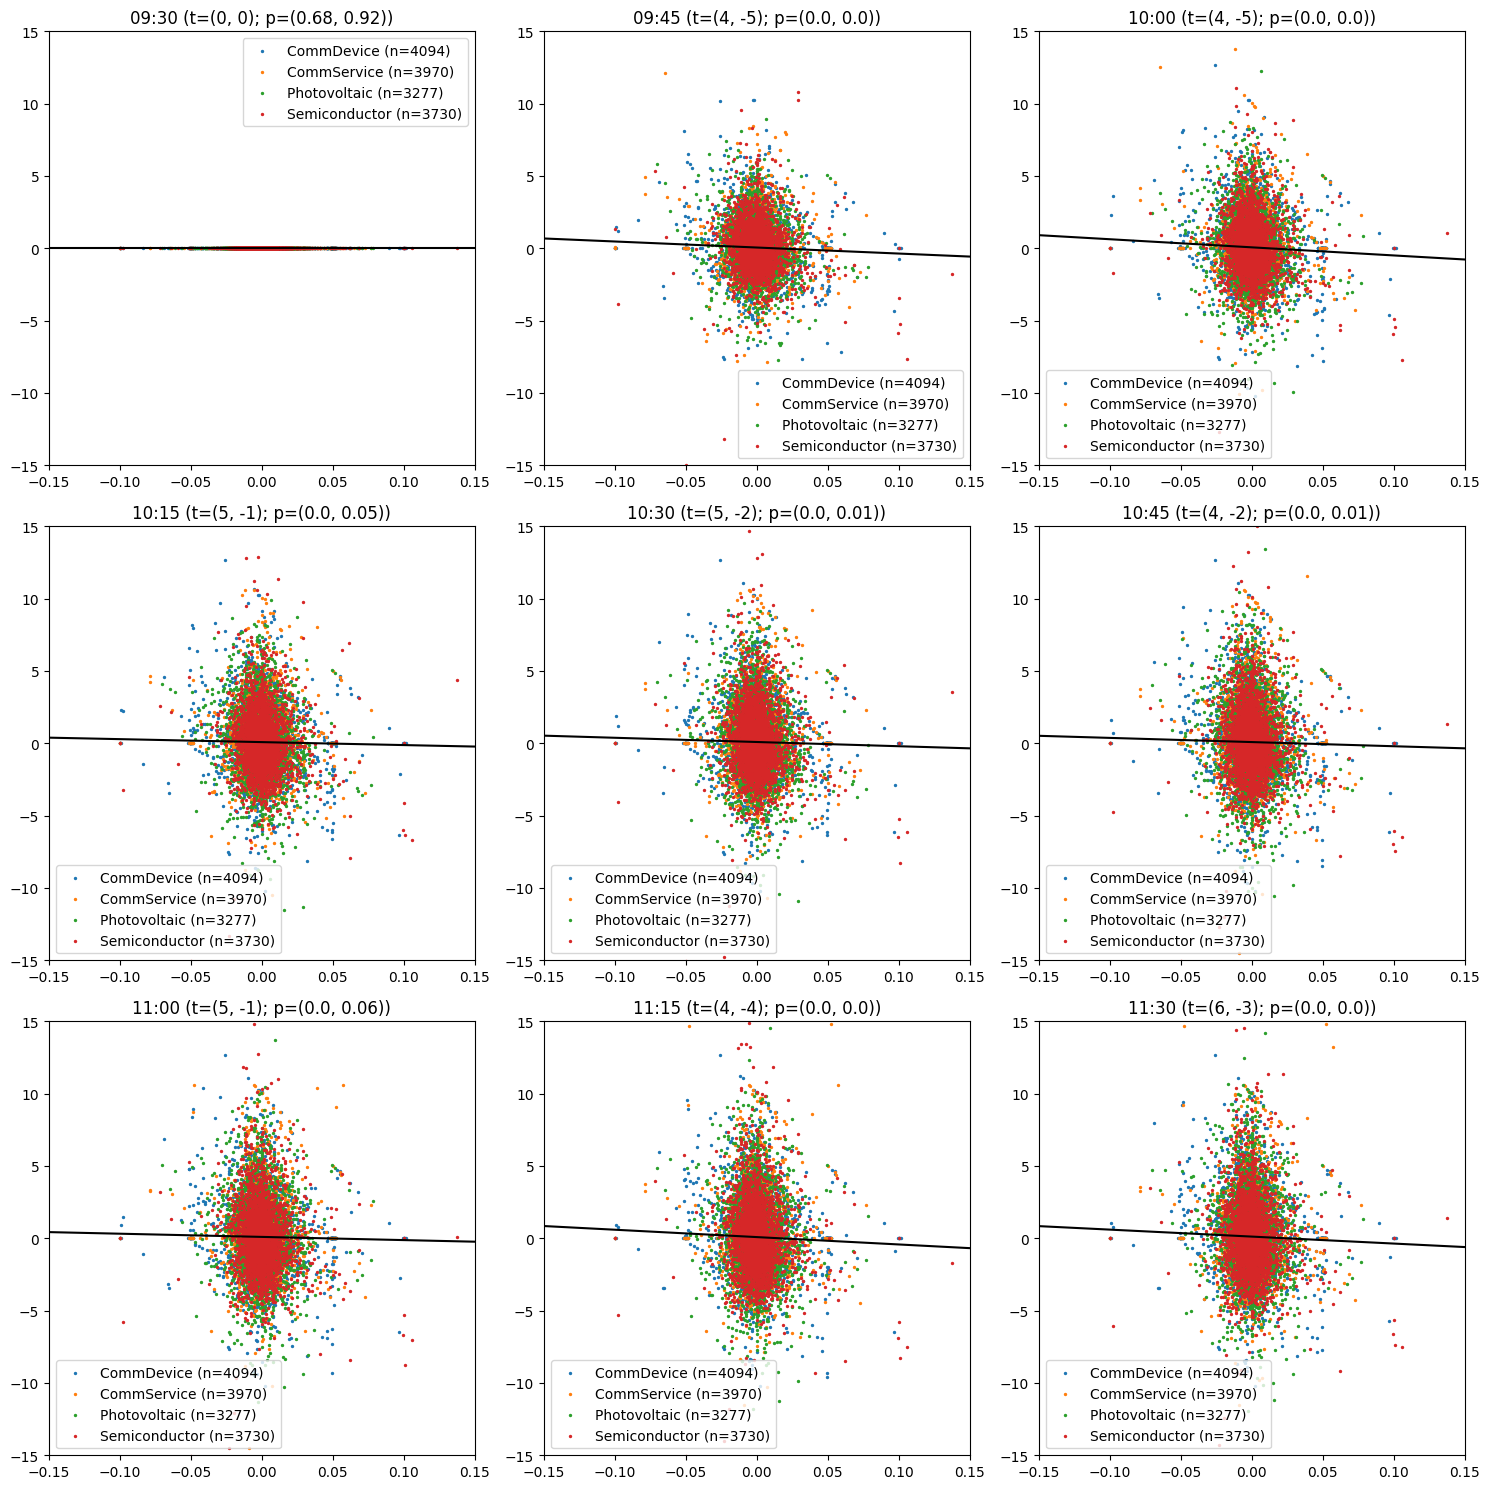

In [43]:
import statsmodels.api as sm

d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

plt.figure(figsize=(15, 15))

for i in range(9):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 15)
    ).time()

    dq = d[(d['Time'] == time)]

    x = dq['Gap'].to_frame()
    y = dq['AccChangeRatio']

    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    if time == dt.time(10, 00):
        print(model.summary())

    plt.subplot(3, 3, i + 1)

    title_time = time.strftime('%H:%M')
    title_t = ', '.join(model.tvalues.astype(int).astype(str))
    title_p = ', '.join(model.pvalues.round(2).astype(str))
    plt.title(f'{title_time} (t=({title_t}); p=({title_p}))')

    plt.ylim(-15, 15)
    plt.xlim(-0.15, 0.15)

    # For different sectors visualization
    for s, dqq in dq.groupby('Sector'):
        plt.scatter(
            dqq['Gap'],
            dqq['AccChangeRatio'],
            s=2,
            label=f'{s} (n={len(dqq)})'
        )
    plt.legend()

    # plt.scatter(
    #     x,
    #     y,
    #     s=2,
    # )

    intercept, coefficient = model.params

    draw_line(coefficient, intercept)

plt.tight_layout()
plt.show()

In [52]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]
d['NoGapSignEqAccChangeRatio'] = np.where(np.sign(d['Gap']) == np.sign(d['AccChangeRatio']), 1, 0)
d['NoGapSignNeAccChangeRatio'] = np.where(np.sign(d['Gap']) != np.sign(d['AccChangeRatio']), 1, 0)
d['Time'] = d['Time'].apply(lambda t: dt.datetime.combine(dt.date.today(), t))
d.groupby(pd.Grouper(key='Time', freq='30T')).agg({ 'NoGapSignEqAccChangeRatio': 'sum', 'NoGapSignNeAccChangeRatio': 'sum' }).reset_index()

/tmp/ipykernel_2905527/1220391686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['NoGapSignEqAccChangeRatio'] = np.where(np.sign(d['Gap']) == np.sign(d['AccChangeRatio']), 1, 0)
/tmp/ipykernel_2905527/1220391686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['NoGapSignNeAccChangeRatio'] = np.where(np.sign(d['Gap']) != np.sign(d['AccChangeRatio']), 1, 0)
/tmp/ipykernel_2905527/1220391686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,Time,NoGapSignEqAccChangeRatio,NoGapSignNeAccChangeRatio
0,2024-12-12 09:30:00,181022,271108
1,2024-12-12 10:00:00,179372,272758
2,2024-12-12 10:30:00,180435,271695
3,2024-12-12 11:00:00,180591,271539
4,2024-12-12 11:30:00,6009,9062
5,2024-12-12 12:00:00,0,0
6,2024-12-12 12:30:00,0,0
7,2024-12-12 13:00:00,176634,260425
8,2024-12-12 13:30:00,183036,269094
9,2024-12-12 14:00:00,183948,268182


In [53]:
from typing import Generator, Optional

pd.options.mode.chained_assignment = None

def backtest(df: pd.DataFrame, time: Optional[dt.time] = None) -> Generator[tuple[str, float, float], None, None]:
    if time is not None:
        df = df[(df['Time'] == time)]
    
    # -1 - short, 1 - long
    df['Action'] = df['Gap'].transform(lambda x: -1 if x > 0 else 1)
    df['Return'] = df['AccChangeRatio'] * df['Action']

    acc_strat = 0
    acc = 0
    for day, d in df.groupby('TradingDay'):
        acc_strat += d['Return'].sum()
        acc += d['AccChangeRatio'].sum()
        yield (day, acc_strat, acc)

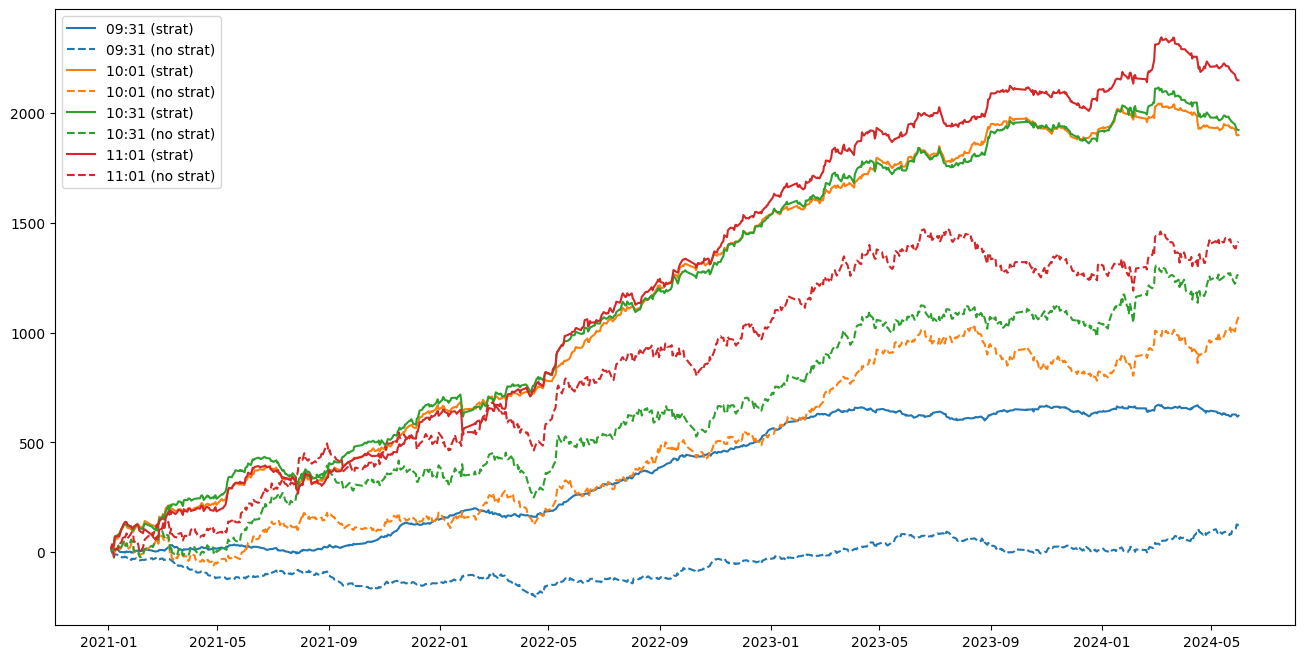

In [54]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

plt.figure(figsize=(16, 8))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(4):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 30 + 1)
    ).time()

    results = list(backtest(d, time = time))

    days = np.fromiter((day for day, _, _ in results), dtype=dt.date)
    returns_strat = np.fromiter((acc for _, acc, _ in results), dtype=np.float32)
    returns = np.fromiter((acc for _, _, acc in results), dtype=np.float32)

    time_label = time.strftime('%H:%M')
    color = colors[i]

    plt.plot(
        days,
        returns_strat,
        linestyle='-',
        color=color,
        label=f'{time_label} (strat)',
    )

    plt.plot(
        days,
        returns,
        linestyle='--',
        color=color,
        label=f'{time_label} (no strat)',
    )

plt.legend()
plt.show()

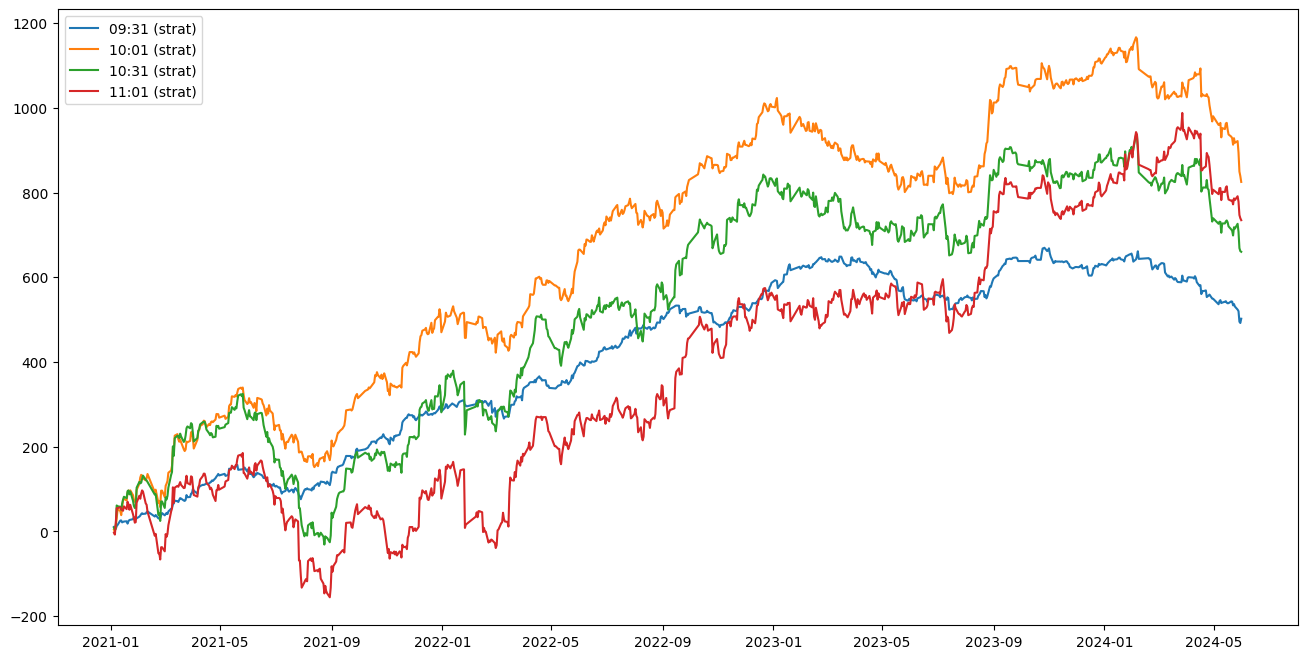

In [55]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

plt.figure(figsize=(16, 8))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(4):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 30 + 1)
    ).time()

    results = list(backtest(d, time = time))

    days = np.fromiter((day for day, _, _ in results), dtype=dt.date)
    returns_strat = np.fromiter((acc for _, acc, _ in results), dtype=np.float32)
    returns = np.fromiter((acc for _, _, acc in results), dtype=np.float32)

    time_label = time.strftime('%H:%M')
    color = colors[i]

    plt.plot(
        days,
        returns_strat - returns,
        linestyle='-',
        color=color,
        label=f'{time_label} (strat)',
    )

plt.legend()
plt.show()